In [1]:
from keras.models import load_model

# Load the model
loaded_model = load_model("hate_speech_lstm_model.h5")

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../../dataset/data_proses.csv")
X = df["Tweet"]

In [5]:
df = df.drop(['HS_Physical','HS_Gender','HS_Other','HS_Weak', 'HS_Moderate','HS_Strong'], axis=1)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,1,0,0,0
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,0,0,0,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0,0,0,0,0,0
3,ku tau mata sipit lihat,0,0,0,0,0,0
4,kaum cebong kafir lihat dongok dungu haha,1,1,0,1,1,0


<Figure size 1200x800 with 0 Axes>

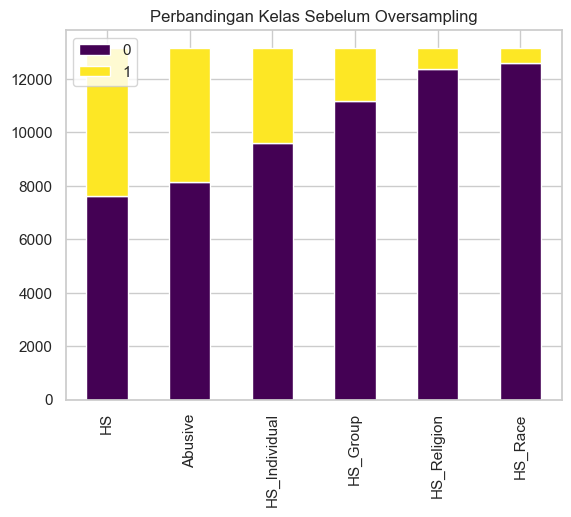

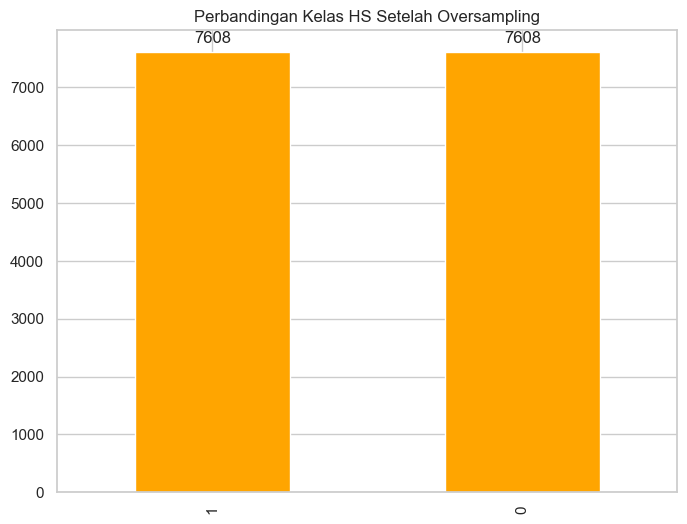

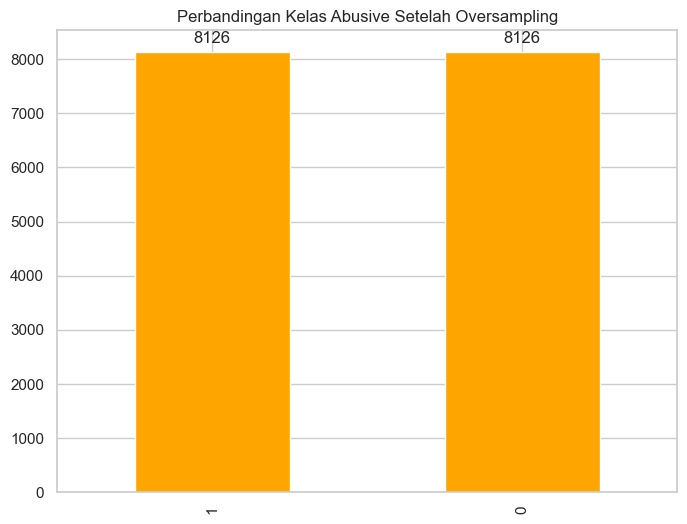

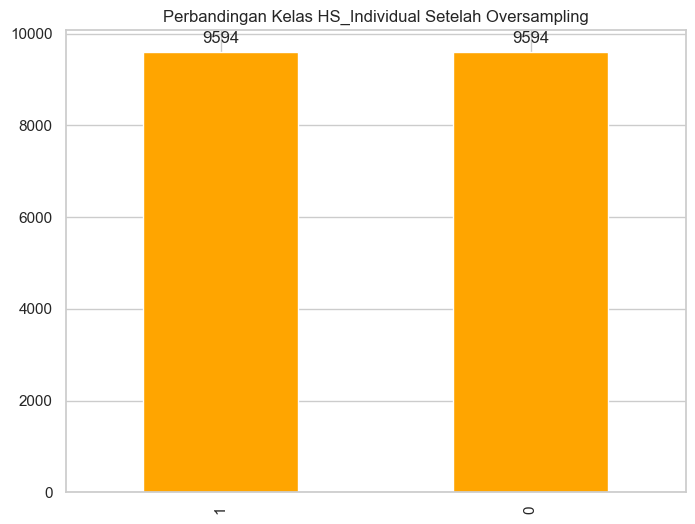

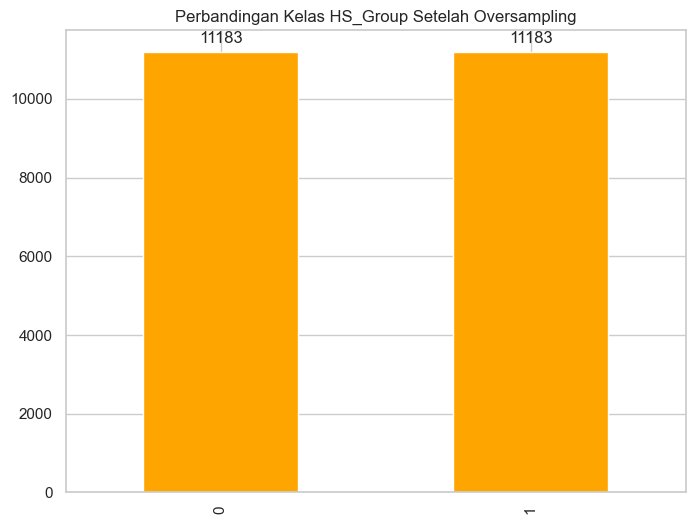

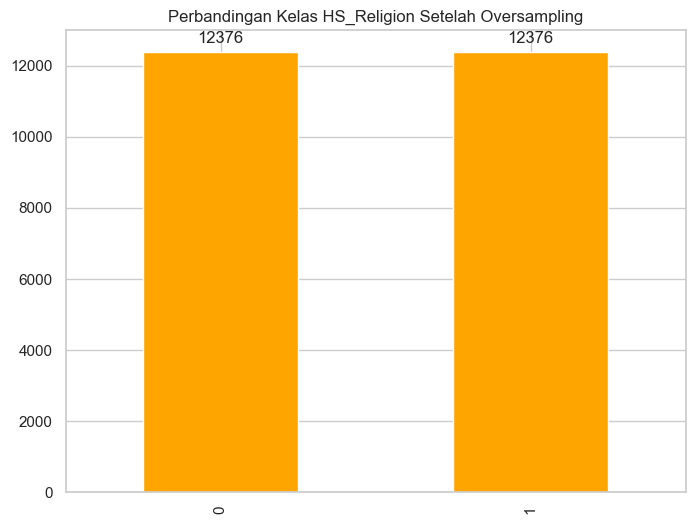

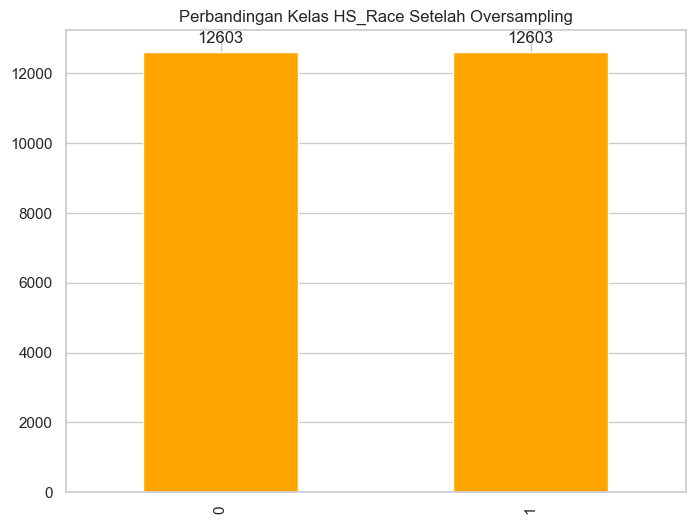

In [6]:
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah nilai 0 dan 1 pada setiap kolom
class_counts = df.drop(columns=['Tweet']).apply(lambda x: x.value_counts()).T

# Menampilkan perbandingan kelas sebelum oversampling
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
class_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Perbandingan Kelas Sebelum Oversampling')
plt.show()

# Mengaplikasikan oversampling untuk setiap kelas
oversample = RandomOverSampler(sampling_strategy='minority')

classes = ['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race']

for target_class in classes:
    X_resampled, y_resampled = oversample.fit_resample(df.drop(columns=['Tweet']), df[target_class])

    # Menghitung jumlah nilai 0 dan 1 setelah oversampling
    resampled_class_counts = pd.Series(y_resampled).value_counts()

    # Menampilkan perbandingan kelas setelah oversampling dengan label
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    ax = resampled_class_counts.plot(kind='bar', color='orange')
    plt.title(f'Perbandingan Kelas {target_class} Setelah Oversampling')

    # Menambahkan label pada batang diagram
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

In [7]:
# Mengaplikasikan oversampling untuk setiap kelas
oversample = RandomOverSampler(sampling_strategy='minority')

classes = ['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race']

# Membuat DataFrame baru untuk menyimpan hasil oversampling
df_resampled = pd.DataFrame()

for target_class in classes:
    X_resampled, y_resampled = oversample.fit_resample(df.drop(columns=['Tweet']), df[target_class])

    # Menyimpan hasil oversampling ke DataFrame baru
    df_resampled['Tweet'] = df['Tweet']
    df_resampled[target_class] = y_resampled

# Menampilkan DataFrame hasil oversampling
print(df)

                                                   Tweet  HS  Abusive  \
0      cowok usaha lacak perhati gue lantas remeh per...   1        1   
1      telat tau edan sarap gue gaul cigax jifla cal ...   0        1   
2      41 kadang pikir percaya tuhan jatuh kali kali ...   0        0   
3                                ku tau mata sipit lihat   0        0   
4              kaum cebong kafir lihat dongok dungu haha   1        1   
...                                                  ...  ..      ...   
13164                 bicara ndasmu congor sekata anjing   1        1   
13165                                  kasur enak kunyuk   0        1   
13166           hati hati bisu bosan duh xf0 x9f x98 xaa   0        0   
13167  bom real mudah deteksi bom kubur dahsyat ledak...   0        0   
13168                            situ foto ya kutil onta   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  
0                  1         0            0        0  
1            

In [8]:
df.duplicated().sum()

387

In [9]:
df = df.drop_duplicates()

In [10]:
df.isna().sum()
df = df.dropna(axis = 0)

In [11]:
import re

def remove(tweet):
    # Remove mentions
    tweet = re.sub("@[A-Za-z0-9_]+", "", tweet)
    # Remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # Remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'^rt[\s]+', '', tweet)
    tweet = re.sub(r'RT', '', tweet)
    # Remove mentions
    tweet = re.sub(r'USER', '', tweet)
    tweet = re.sub(r'URL', '', tweet)
    tweet = re.sub(r'xf0', '', tweet)
    tweet = re.sub(r'x9f', '', tweet)
    tweet = re.sub(r'x98', '', tweet)
    tweet = re.sub(r'x80', '', tweet)
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#', '', tweet)
    # Remove percentage signs
    tweet = re.sub(r'%', '', tweet)
    tweet = re.sub(r'x', '', tweet)
    # Remove commas
    tweet = re.sub(r',', '', tweet)
    tweet = re.sub(r'x80', '', tweet)
    # Remove numbers
    tweet = re.sub('[0-9]+', '', tweet)
    # Remove colons
    tweet = re.sub(r':', '', tweet)
    # Remove non-ASCII characters (including emoji)
    tweet = tweet.encode('ascii', 'ignore').decode('utf-8')
    # Remove unwanted characters (add more if needed)
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    # Remove extra spaces
    tweet = re.sub('\s+', ' ', tweet)
    return tweet.strip()

# Apply the remove function to 'Tweet' column and store in 'lower' column
df['Tweet'] = df['Tweet'].apply(lambda x: remove(x.lower()))
df[["Tweet"]].head(10)

,Tweet
0,cowok usaha lacak perhati gue lantas remeh per...
1,telat tau edan sarap gue gaul ciga jifla cal l...
2,kadang pikir percaya tuhan jatuh kali kali kad...
3,ku tau mata sipit lihat
4,kaum cebong kafir lihat dongok dungu haha
5,ya bani taplak kawan kawan
6,deklarasi pilih kepala daerah aman anti hoaks ...
7,gue selesai re watch aldnoah zero kampret kara...
8,admin belanja po nak makan ais kepal milo ais ...
9,enak ngewe


In [12]:
# import spacy 
# nlp = spacy.load('en_core_web_sm')
# def lemmatization (text):
#     doc = nlp(text)
#     tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
#     return ' '.join(tokens)
# df['Steem'] = df['Tweet'].apply(lemmatization)
# df.head(10)

In [13]:
# Pisahkan data dan label
X = df["Tweet"]
y = df[["HS", "Abusive", "HS_Individual", "HS_Group","HS_Religion","HS_Race"]]

In [14]:
# Tokenisasi
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Padding
X = pad_sequences(X)

In [21]:
def predict_hate_speech(tweet):
    # Preprocess the input (tokenize and pad)
    tweet_sequence = tokenizer.texts_to_sequences([tweet])
    tweet_padded = pad_sequences(tweet_sequence, maxlen=X.shape[1])

    # Make prediction using the loaded model
    prediction = loaded_model.predict(tweet_padded)[0]

    # Convert the prediction to labels
    labels = ["ujaran kebencian", "bahasa kasar ", "ujaran kebencian kepada personal", "ujaran kebencian kepada kelompok", "ujaran kebencian kepada suatu agama", "ujaran kebencian kepada suatu ras"]
    result = {labels[i]: prediction[i] for i in range(len(labels))}
    
    # Add a flag indicating whether any of the specified labels are present
    flag_true_labels = [label for label in labels if result[label] > 0.5]
    result["HASIL"] = {
        "PREDIKSI": "KALIMAT NEGATIF TERINDIKASI UJARAN KEBENCIAN" if flag_true_labels else "KALIMAT POSITIF TIDAK TERINDIKASI UJARAN KEBENCIAN",
        "LABEL TERINDIKASI": flag_true_labels,
    }
    # Generate a user-friendly summary
    summary = f"Prediksi: {result['HASIL']['PREDIKSI']}\n"
    if flag_true_labels:
        summary += f"Terindikasi: {', '.join(flag_true_labels)}"
        
    # Determine image URL based on prediction
    image_url = "https://disk.mediaindonesia.com/files/news/2022/06/2ee9a8099454bc0fe5a44dfcedb2c761.jpg" if flag_true_labels else "https://prokomsetda.bulelengkab.go.id/public/uploads/konten/hindari-kasus-hate-speech-di-medsos-informasi-ini-perlu-kamu-pahami-29.jpg"

    return summary, image_url


In [ ]:
# https://disk.mediaindonesia.com/files/news/2022/06/2ee9a8099454bc0fe5a44dfcedb2c761.jpg
# https://prokomsetda.bulelengkab.go.id/public/uploads/konten/hindari-kasus-hate-speech-di-medsos-informasi-ini-perlu-kamu-pahami-29.jpg
import gradio as gr

iface = gr.Interface(
    fn=predict_hate_speech,
    title = "KLASIFIKASI UJARAN KEBENCIAN",
    description= """Ujaran kebencian adalah bentuk ekspresi yang menyampaikan pesan atau pernyataan yang memiliki tujuan untuk merendahkan, menghina, atau menyerang kelompok atau individu berdasarkan karakteristik tertentu, seperti ras, agama.\n
    """,
    article = """ Petunjuk : \n
    - Jika output bernilai >0.5 maka cuitan / Tweet yang Anda tulis mengandung Ujaran Kebencian / Hate Speech \n
    - jika selesai melakukan input tweet, klik flag untuk memasukkan data kepada admin yang bertujuan untuk data penelitian selanjutnya \n""",
    # - HS (Hate Speech)	                            Fitur ujaran kebencian secara umum\n
    # - Abusice (Kasar)	                        Fitur kalimat kasar\n
    # - HS Individual (Hate Speech Individu)	    Fitur ujaran kebencian dengan target perorangan / individu\n
    # - HS Group (Hate Speech Kelompok)	        Fitur ujaran kebencian dengan target kelompok\n
    # - HS Religion (Hate Speech Agama)	        Fitur ujaran kebencian dengan target agama\n
    # - HS Race (Hate Speech ras)	                Fitur ujaran kebencian dengan target ras\n

    # """,
    inputs="text",
    outputs=["text", "image"],
    live=False,
    layout="vertical",
    style="info",
    bgcolor="#f0f0f0",
    size=(500, 200),
    button="success",
)

iface.launch(share=True)

C:\Users\nuvolaofficial\AppData\Local\Temp\ipykernel_18692\105002361.py:5: GradioDeprecationWarning: `layout` parameter is deprecated, and it has no effect
  iface = gr.Interface(
C:\Users\nuvolaofficial\AppData\Local\Temp\ipykernel_18692\105002361.py:5: GradioUnusedKwargWarning: You have unused kwarg parameters in Interface, please remove them: {'style': 'info', 'bgcolor': '#f0f0f0', 'size': (500, 200), 'button': 'success'}
  iface = gr.Interface(


Running on local URL:  http://127.0.0.1:7864
Running on public URL: https://8cde16309f7ea1c3a4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 146ms/step
